# Driving

In [12]:
from datetime import timedelta
from matplotlib import pyplot as plt

from dpd.driving import Route, Vehicle
from dpd.osm import OSM

In [14]:
expo_line_west = 2351006
blue_line_north = 2351005
s1_ost_flug = 1773071
bart_red_south = 2851509
caltrain_local = 2768041
san_bernardino_line = 1287719
orange_county_line = 2812899
ca_hsr = 7739486

max_speed_55_mph_vehicle = Vehicle(24.5872, 0.3, -0.3)
max_speed_80_mph_vehicle = Vehicle(35.7632, 0.45, -0.45)
max_speed_80_mph_vehicle_slow_accel = Vehicle(35.7632, 0.15, -0.15,)
max_speed_100_mph_vehicle = Vehicle(44.704, 0.3, -0.3)
max_speed_125_mph_vehicle = Vehicle(55.88, 0.3, -0.3)
max_speed_220_mph_vehicle = Vehicle(98.3488, 0.3, -0.3)

vehicle = max_speed_80_mph_vehicle
relation = bart_red_south

if relation == bart_red_south:
    gague = 1.676
else:
    gague = 1.435

osm = OSM()
osm.download_relation(relation)

route = Route.from_osm_relation(osm, relation, gague=gague)
route

,geometry,name
0,POINT (-122.35242 37.93595),Richmond
1,POINT (-122.35238 37.93591),NaN
2,POINT (-122.35219 37.93570),NaN
3,POINT (-122.35198 37.93550),NaN
4,POINT (-122.35174 37.93524),NaN
...,...,...
552,POINT (-122.46736 37.70826),NaN
553,POINT (-122.46756 37.70803),NaN
554,POINT (-122.46820 37.70725),NaN
555,POINT (-122.46856 37.70681),NaN


In [15]:
trip = route.drive(vehicle, 45)
trip

,distance,time,name,speed_before_segment,speed_after_segment,speed_limit,acceleration,total_time,timedelta,total_distance
datetime,,,,,,,,,,
1970-01-01 00:00:00.000000,0.000000,0.000000,Richmond,NaN,NaN,NaN,NaN,0.000000,0 days 00:00:00,0.000000
1970-01-01 00:00:45.000000,0.000000,45.000000,Richmond,NaN,NaN,NaN,NaN,45.000000,0 days 00:00:45,0.000000
1970-01-01 00:00:49.949098,5.511053,4.949098,NaN,0.000000,2.227094,35.763200,0.45,49.949098,0 days 00:00:49.949098,5.511053
1970-01-01 00:00:57.398117,29.074439,7.449019,NaN,2.227094,5.579153,35.763200,0.45,57.398117,0 days 00:00:57.398117,34.585492
1970-01-01 00:01:01.910249,29.754727,4.512132,NaN,5.579153,7.609612,35.763200,0.45,61.910249,0 days 00:01:01.910249,64.340219
...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:53:48.181805,0.000000,0.000000,NaN,18.255339,18.255339,18.255339,0.45,3228.181805,0 days 00:53:48.181805,40440.237108
1970-01-01 00:53:48.183473,0.030446,0.001668,NaN,18.255339,18.255339,18.255339,0.00,3228.183473,0 days 00:53:48.183473,40440.267554
1970-01-01 00:54:28.750894,370.286022,40.567421,NaN,18.255339,0.000000,18.255339,-0.45,3268.750894,0 days 00:54:28.750894,40810.553576


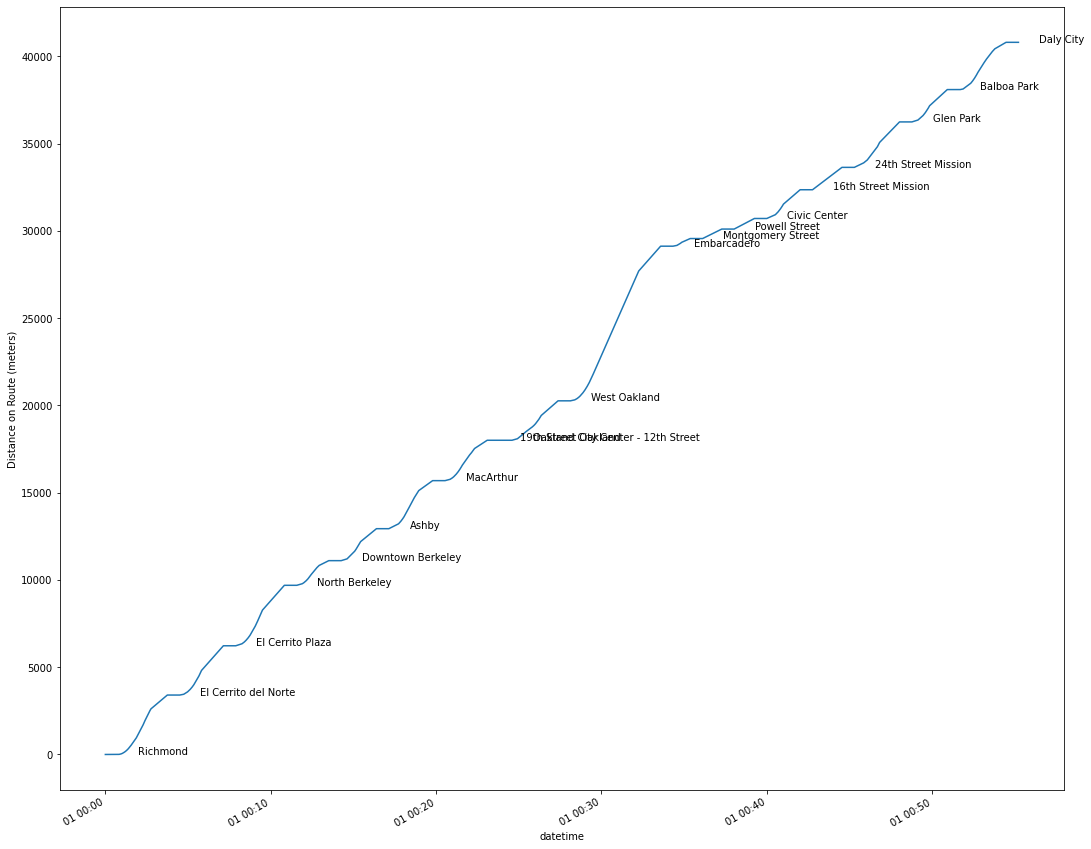

In [13]:
from matplotlib import pyplot
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
trip.total_distance.plot(ax=ax)

annotated_stops = []
for idx, row in trip[trip.name.notnull()].iterrows():
    if row["name"] not in annotated_stops:
        plt.annotate(text=row["name"], xy=(idx + timedelta(minutes=2), row["total_distance"]))
    annotated_stops.append(row["name"])
    
plt.ylabel("Distance on Route (meters)")

plt.show()

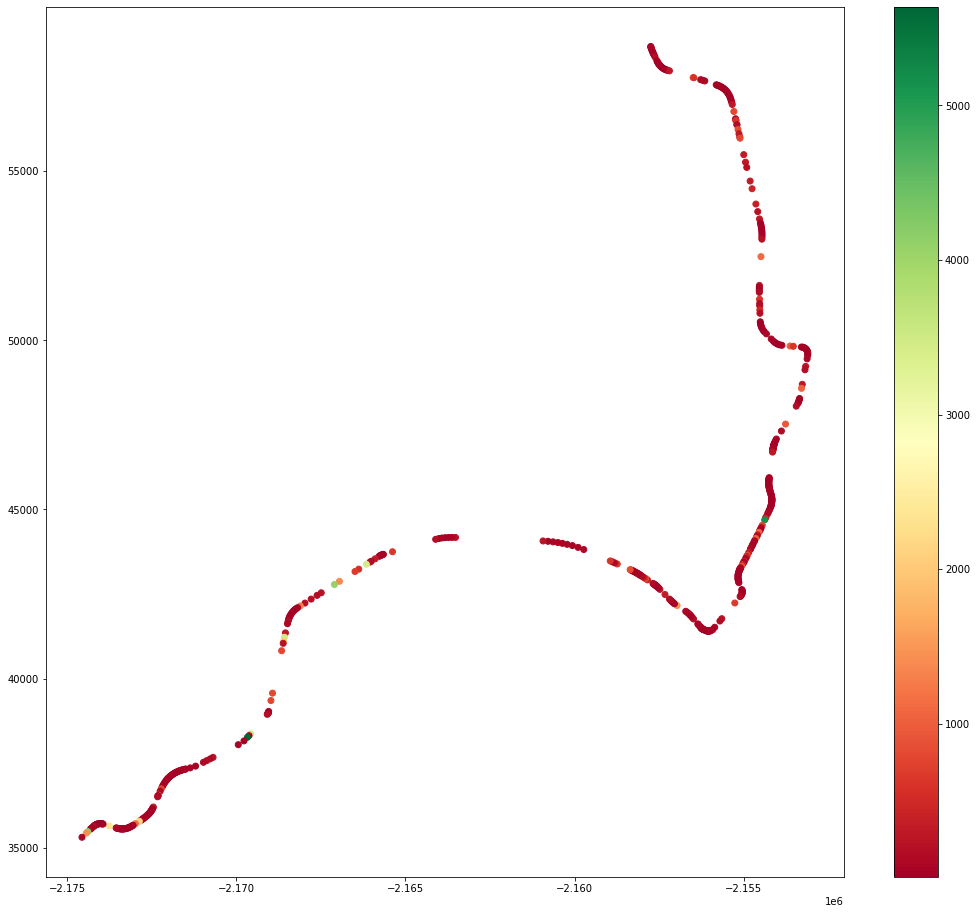

In [4]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
trip.plot(column="speed_limit", cmap="RdYlGn", legend=True, ax=ax)
plt.show()

/usr/local/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


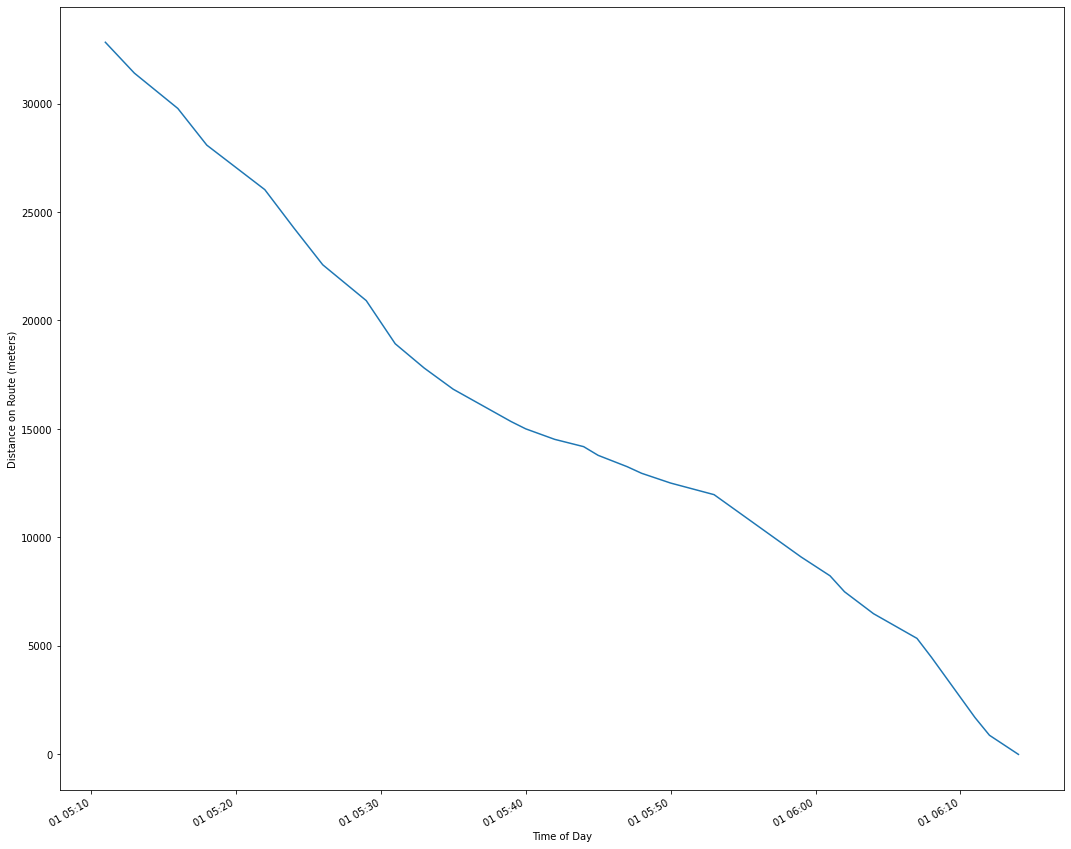

In [6]:
feed = gtfs_kit.read_feed(
    "http://iportal.sacrt.com/gtfs/SRTD/google_transit.zip", dist_units="mi"
)
trip = Trip.from_gtfs(feed=feed, route_id="533", service_id="1")

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
trip.plot_schedule()
plt.xlabel("Time of Day")
plt.ylabel("Distance on Route (meters)")
plt.show()

In [31]:
import numpy
from dpd.geometry import circle_from_three_circumference_points


def find_curve_direction(p0, p1, p2):
    p0_p2 = numpy.array(p2) - numpy.array(p0)
    p0_p1 = numpy.array(p1) - numpy.array(p0)
    cross_product = numpy.cross(p0_p2, p0_p1)
    if cross_product < 0:
        return "left_handed"
    elif cross_product > 0:
        return "right_handed"
    else:
        return "straight"


def find_curvature(p0, p1, p2, straight_section_cutoff=775):
    (x, y), r = circle_from_three_circumference_points(p0, p1, p2)
    direction = find_curve_direction(p0, p1, p2)
    if r > 775:
        direction = "straight"
    return direction

from shapely.geometry import Point

direction = "straight"
segments = []
total = len(way) - 2
point = way[0]
for i in range(total):
    new_direction = find_curvature(way[i], way[i + 1], way[i + 2])
    if new_direction != direction:
        print("change of direction from %s to %s" % (direction, new_direction))
        print("at point %s" % (i + 1))
        if direction == "straight":
            segments.append(StraightSection(Point(point), Point(way[i + 1])))
        else:
            if direction == "right_handed":
                handed = True
            else:
                handed = False
            segments.append(CurvedSection(Point(point), Point(way[i+1]), radius_of_curvature=1000, right_handed=handed))
        direction = new_direction
        point = way[i + 1]

change of direction from straight to left_handed
at point 13
change of direction from left_handed to straight
at point 24
change of direction from straight to right_handed
at point 36
change of direction from right_handed to straight
at point 48
